# Credit Card Type Detection with CNN (In Progress)

The aim of this notebook is to predict whether a credit card is Visa card, Master card, or UnionPay card, given their images using Convolution Neutral Network with Keras.

In [1]:
# Loading required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

In [3]:
df = pd.read_csv('input/credit-card.csv')
# Since other card types have too little sample, we only use 3 types of cards as our study target
df = df[df.card_type.isin(['Visa', 'MasterCard', 'UnionPay'])] 

In [4]:
from scipy import misc

# Reading the image
card_images_raw = list(map(lambda img: misc.imread('input/train_trim_card_image/'+img, mode = 'RGB'), df.image_name))
card_image_matrix = np.array(card_images_raw)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df.card_type)
encoded_card_type = encoder.transform(df.card_type)

In [6]:
# As usual practice, we split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(card_image_matrix, encoded_card_type, test_size=0.2, random_state=812)

In [8]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 3)
Y_test = np_utils.to_categorical(y_test, 3)

Using TensorFlow backend.


In [9]:
print(X_train.shape)
print(Y_train.shape)

(101, 56, 92, 3)
(101, 3)


In [70]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, Cropping2D
from keras.layers.local import LocallyConnected2D
from keras.layers.pooling import MaxPooling2D,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

In [85]:
model = Sequential()
# model.add(Cropping2D(cropping=((0, 0), (0, 0)), input_shape=(56, 92, 3)))
model.add(Convolution2D(6, (3, 3), activation='relu', input_shape=(56, 92, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(12, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24, (3, 3), activation='relu'))
model.add(GlobalMaxPooling2D())
# model.add(Convolution2D(3, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Convolution2D(3, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(3, kernel_regularizer=regularizers.l2(0.008), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 54, 90, 6)         168       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 27, 45, 6)         0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 25, 43, 12)        660       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 12, 21, 12)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 10, 19, 24)        2616      
_________________________________________________________________
global_max_pooling2d_23 (Glo (None, 24)                0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 24)                0         
__________

In [86]:
earlystopping = EarlyStopping(monitor='val_loss', patience=30)

model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          batch_size=20, epochs=100, verbose=1, 
          callbacks=[earlystopping],
         shuffle = True)

Train on 101 samples, validate on 26 samples
Epoch 1/100
101/101 [==============================] - 1s - loss: 11.4917 - acc: 0.2475 - val_loss: 9.9627 - val_acc: 0.3846
Epoch 2/100
101/101 [==============================] - 0s - loss: 10.0369 - acc: 0.3366 - val_loss: 9.6388 - val_acc: 0.3846
Epoch 3/100
101/101 [==============================] - 0s - loss: 8.3717 - acc: 0.3762 - val_loss: 8.9839 - val_acc: 0.3462
Epoch 4/100
101/101 [==============================] - 0s - loss: 6.5202 - acc: 0.5248 - val_loss: 6.1022 - val_acc: 0.4615
Epoch 5/100
101/101 [==============================] - 0s - loss: 6.3657 - acc: 0.4752 - val_loss: 8.6800 - val_acc: 0.3462
Epoch 6/100
101/101 [==============================] - 0s - loss: 6.1912 - acc: 0.4851 - val_loss: 5.5068 - val_acc: 0.3846
Epoch 7/100
101/101 [==============================] - 0s - loss: 5.8371 - acc: 0.4752 - val_loss: 5.3603 - val_acc: 0.4615
Epoch 8/100
101/101 [==============================] - 0s - loss: 4.8395 - acc: 0.574

101/101 [==============================] - 0s - loss: 0.3048 - acc: 0.8911 - val_loss: 1.0280 - val_acc: 0.7308
Epoch 67/100
101/101 [==============================] - 0s - loss: 0.6475 - acc: 0.8020 - val_loss: 1.0933 - val_acc: 0.7308
Epoch 68/100
101/101 [==============================] - 0s - loss: 0.5278 - acc: 0.8218 - val_loss: 0.6827 - val_acc: 0.8077
Epoch 69/100
101/101 [==============================] - 0s - loss: 0.2437 - acc: 0.9208 - val_loss: 0.3506 - val_acc: 0.8462
Epoch 70/100
101/101 [==============================] - 0s - loss: 0.2511 - acc: 0.9406 - val_loss: 0.2448 - val_acc: 0.9615
Epoch 71/100
101/101 [==============================] - 0s - loss: 0.3187 - acc: 0.9010 - val_loss: 0.2378 - val_acc: 0.9615
Epoch 72/100
101/101 [==============================] - 0s - loss: 0.1766 - acc: 0.9505 - val_loss: 0.2375 - val_acc: 0.9615
Epoch 73/100
101/101 [==============================] - 0s - loss: 0.3130 - acc: 0.8713 - val_loss: 0.3285 - val_acc: 0.9231
Epoch 74/100


In [87]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.26121416687965393, 0.92307692766189575]

In [101]:
model.save('output/credit_card_type_cnn.h5')

In [88]:
prediction = model.predict_classes(X_test)

26/26 [==============================] - 0s


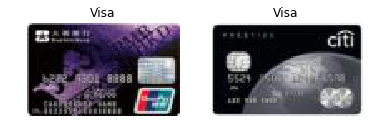

In [89]:
wrong_predict_card = X_test[y_test != prediction]
wrong_predict_label = prediction[y_test != prediction]
num_wrong_predict = len(wrong_predict_label)

for i in range(num_wrong_predict):
    plt.subplot(1,num_wrong_predict,i+1).set_title(encoder.inverse_transform(wrong_predict_label[i]))
    plt.imshow(wrong_predict_card[i].reshape((56,92,3)))
    plt.axis('off')

Lastly, I download some credit card images from other site to see if we can predict the card type correctly

In [93]:
# Function to predict any other single image
def predict_credit_card_type(img_file):
    img=misc.imread(img_file)[:,:,:3]
    img = np.array([misc.imresize(img, (56, 92, 3))])
    return encoder.inverse_transform(model.predict_classes(img, verbose = 0))

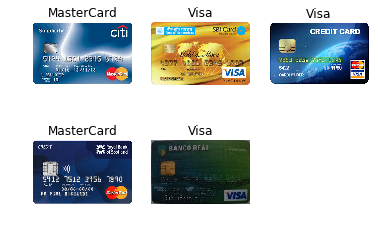

In [94]:
test_images = ['input/test_card_image/'+x for x in ['master-card.jpg', 'visa.jpg','mix.jpg', 'master-card-2.jpg', 'test.jpg']]
num_test_images = len(test_images)
for i in range(num_test_images):
    plt.subplot(2,num_test_images//2+1,i+1).set_title(predict_credit_card_type(test_images[i])[0])
    plt.imshow(misc.imread(test_images[i]))
    plt.axis('off')

Next, predict Singapore card

In [207]:
# # Code to download all the training image, which is skipped here
# url = 'https://www.singsaver.com.sg/api/credit-card/v2/cards/all?lang=en&pageSize=1000'

# response = requests.get(url)
# data = response.json()

# cards = data['cards']
# # card_names =  [card['name'] for card in cards]
# card_images = [card['image'] for card in cards]
# card_images_name = [re.search('([^/]+$)', image).group(1) for image in card_images]

# # Download image
# import urllib
# for i in range(len(card_images)):
#     urllib.request.urlretrieve(card_images[i], 'test/singsaver/'+card_images_name[i])


In [96]:
import os
image_name_sg = os.listdir('input/validation_trim_card_image/')

In [97]:
# Reading the image
card_images_raw_sg = list(map(lambda img: misc.imread('input/validation_trim_card_image/'+img)[:,:,:3], image_name_sg))
card_images_resize_sg = list(map(lambda img: misc.imresize(img, (56, 92, 3)), card_images_raw_sg))
# for i in range(len(card_images_resize_sg)):
#     misc.imsave('test/singsaver/'+image_name_sg[i], card_images_resize_sg[i])
card_image_matrix_sg = np.array(card_images_resize_sg)

In [98]:
card_image_matrix_sg.shape


(103, 56, 92, 3)

In [99]:
prediction_sg = model.predict_classes(card_image_matrix_sg)

 96/103 [==========================>...] - ETA: 0s

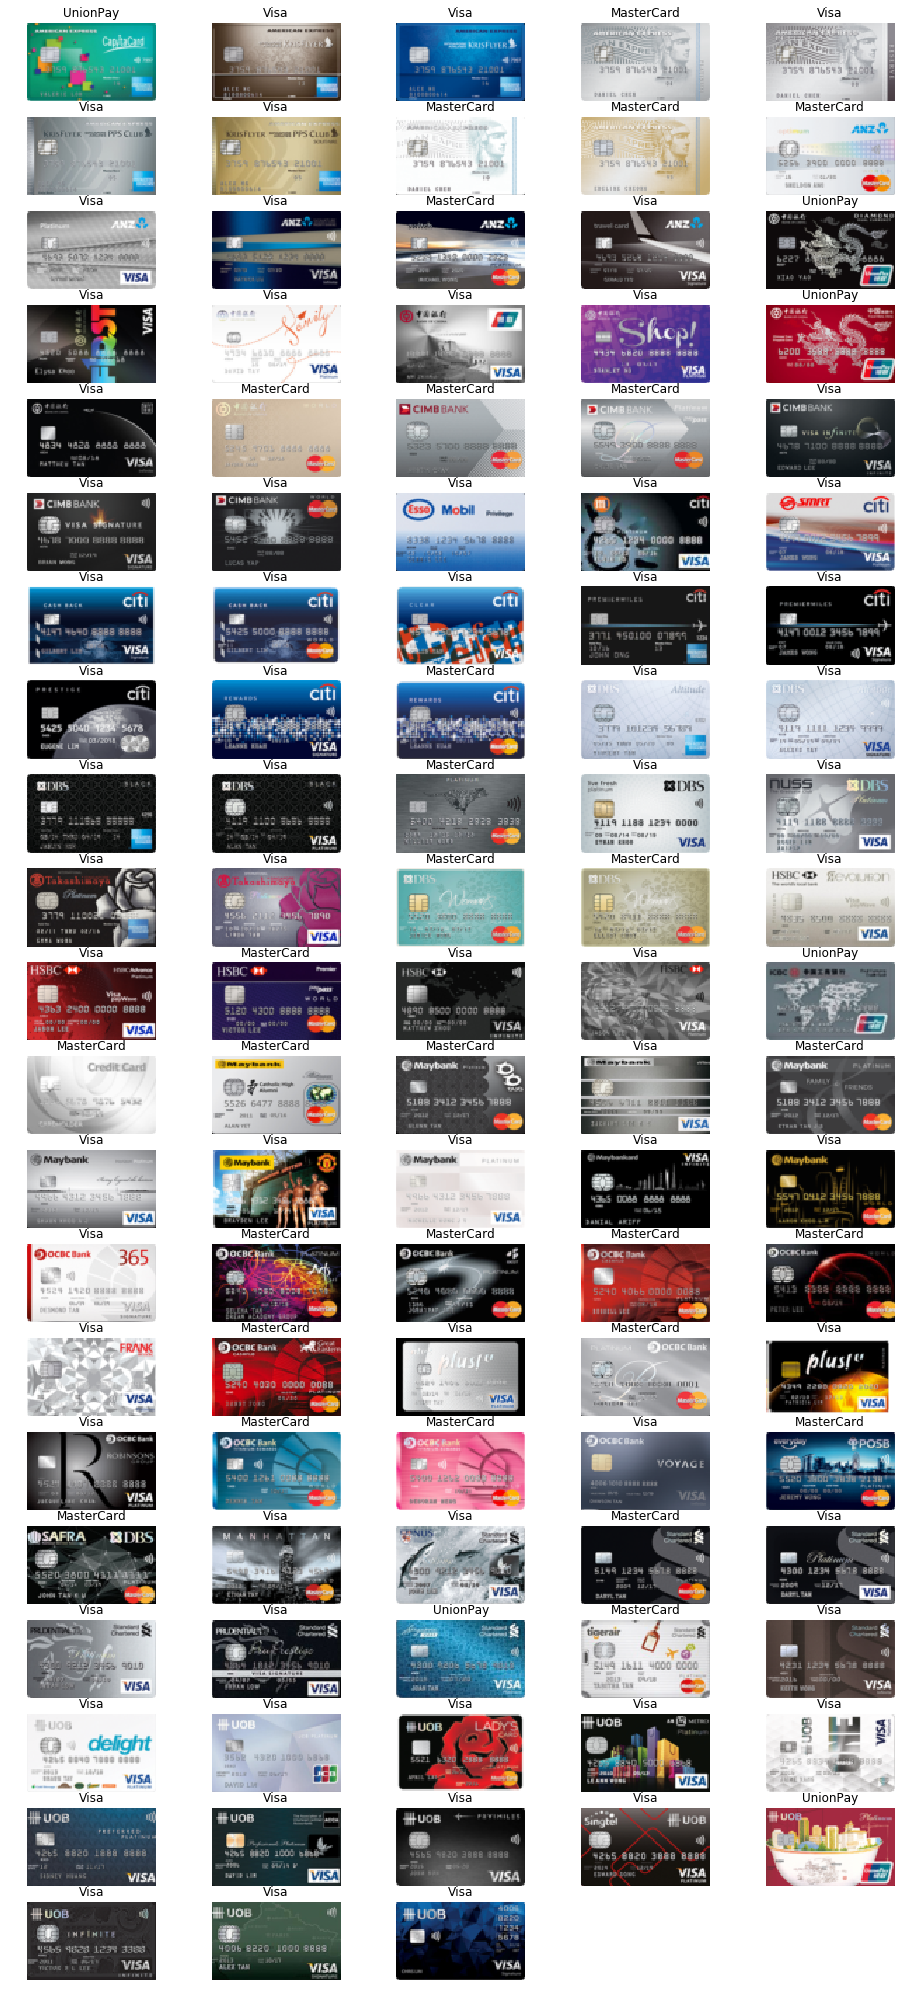

In [100]:
# num_test_images_sg = len(prediction_sg)
num_test_images_sg = len(prediction_sg)
num_col = 5
plt.figure(figsize=(16,36))
for i in range(num_test_images_sg):
    plt.subplot(num_test_images_sg//num_col+1,num_col,i+1).set_title(encoder.inverse_transform(prediction_sg[i]))
    plt.imshow(card_image_matrix_sg[i,:,:,:])
    plt.axis('off')

To conclude, our simple SVM provided a fair enough prediction. However, please note that most of these success is due to the consistency of the card structure. In fact, if the card type logo is on other position, or we have different size of credit card, we may have have to use more advance model like convolution neural network.

In [ ]:
# image generator

In [ ]:
# quavier

In [ ]:
# tensorboard

In [ ]:
# visualization
convolution2d_1 = model.get_layer(name = 'convolution2d_1' )
i = 0
for w in np.rollaxis(convolution2d_1.get_weights()[0], 3):
    plt.subplot(2,2,i+1)
    plt.imshow(w, interpolation='none')
    plt.axis('off')
    i += 1
    
convolution2d_2 = model.get_layer(name = 'convolution2d_2' )
i = 0
for w in np.rollaxis(convolution2d_2.get_weights()[0], 3):
    plt.subplot(2,2,i+1)
    plt.imshow(w, interpolation='none')
    plt.axis('off')
    i += 1

In [ ]:
# T-SNE
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
card_image_2d = model.fit_transform(card_image_arr) 
x, y = list(zip(*card_image_2d))

df['x'] = x
df['y'] = y

import seaborn as sns
sns.lmplot('x', 'y', data=df, hue='card_provider_id', fit_reg=False)
plt.show()


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

def plot_tsne(X, X_embedded, name, min_dist=3.0):
    #plt.ioff()
    num_images = len(X)
    fig = plt.figure(figsize=(100,100))
    ax = plt.axes(frameon=False)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=np.zeros((num_images)), marker="x")
    count =0
    if min_dist is not None:
        shown_images = np.array([[10., 10.]])
        for i in range(len(X_embedded)):
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            count+=1
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                plt.offsetbox.OffsetImage(X[i],cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)
            
plot_tsne(card_images_resize, card_image_2d,"t-SNE", min_dist=1.0)